In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
train_data = pd.read_csv(r'E:\University\Tehran University_Arshad\Terme 2\Machine learning\0 Hws\4\Hw4\Fashion-MNIST-CSV\Fashion-MNIST/trainData.csv').values
train_labels =pd.read_csv(r'E:\University\Tehran University_Arshad\Terme 2\Machine learning\0 Hws\4\Hw4\Fashion-MNIST-CSV\Fashion-MNIST/trainLabels.csv').values
test_data = pd.read_csv(r'E:\University\Tehran University_Arshad\Terme 2\Machine learning\0 Hws\4\Hw4\Fashion-MNIST-CSV\Fashion-MNIST/testData.csv').values
test_labels = pd.read_csv(r'E:\University\Tehran University_Arshad\Terme 2\Machine learning\0 Hws\4\Hw4\Fashion-MNIST-CSV\Fashion-MNIST/testLabels.csv').values

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# Part A

In [3]:
c=10
m=np.zeros((c,784))  #Mean of each class
for i in range(c):
    a=np.where(train_labels==i)[0]
    m[i]=np.mean(train_data[a], axis=0)

In [4]:
Sw=np.zeros((784,784))
for i in range(10):
    S = np.zeros((784,784))  # each class' scatter matrix
    for row in train_data[np.where(train_labels==i)[0]]:
        row, mv = row.reshape(-1, 1), m[i].reshape(-1, 1)  # column vectors
        S += (row - mv).dot((row - mv).T)
    Sw += S  # sum class scatter matrices

In [5]:
M=np.mean(train_data, axis=0) #Total mean All the Dataset
Sb=np.zeros((784,784))
M1=M.reshape(-1, 1) # column vectors 
for i in range(10):
    mv=m[i].reshape(-1, 1)  # column vectors
    a=np.where(train_labels==i)[0]
    Sb += ((mv - M1).dot((mv - M1).T))*len(train_data[a]) # between class scatter m

In [6]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

In [7]:
eigs=np.sort(np.real(np.round(eig_vals, 3)))[::-1]

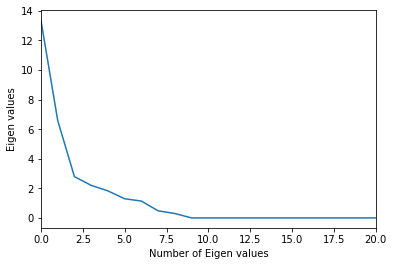

In [8]:
plt.plot(range(784),eigs)
plt.xlabel('Number of Eigen values')
plt.ylabel('Eigen values')
plt.xlim([0,20])
plt.show()

# Part B: trace_seperability measure

In [9]:
np.trace(np.linalg.inv(Sw).dot(Sb))
np.sum(eigs[:7])

29.208

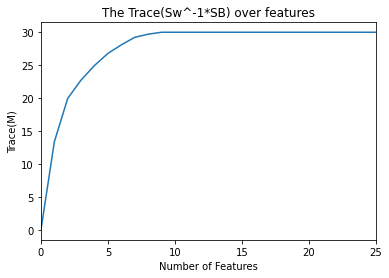

In [10]:
sum_mem=np.zeros(784)
for j in range(784):
    sum_mem[j]=np.sum(eigs[:j])
# sum_mem=sum_mem/np.max(sum_mem)*100    
plt.plot(range(784),sum_mem)
plt.xlabel('Number of Features')
plt.ylabel('Trace(M)')
plt.title('The Trace(Sw^-1*SB) over features')
plt.xlim([0,25])
plt.show()

In [11]:
W=eig_vecs[np.real(np.round(eig_vals, 3))>0.1]
Y=W.dot(train_data.T)
Y=np.real(Y.T)
Y_test=W.dot(test_data.T)
Y_test=np.real(Y_test.T)

In [12]:
W.shape

(9, 784)

# Part C

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

In [14]:
clf = GaussianNB()
clf.fit(Y, train_labels.ravel())

GaussianNB()

In [15]:
print(classification_report(test_labels, clf.predict(Y_test), target_names=class_names))

              precision    recall  f1-score   support

           0       0.70      0.55      0.62      1000
           1       0.81      0.84      0.83      1000
           2       0.47      0.28      0.35      1000
           3       0.60      0.63      0.62      1000
           4       0.44      0.61      0.51      1000
           5       0.46      0.69      0.55      1000
           6       0.31      0.14      0.19      1000
           7       0.68      0.84      0.75      1000
           8       0.67      0.65      0.66      1000
           9       0.68      0.68      0.68       999

    accuracy                           0.59      9999
   macro avg       0.58      0.59      0.58      9999
weighted avg       0.58      0.59      0.58      9999



<AxesSubplot:>

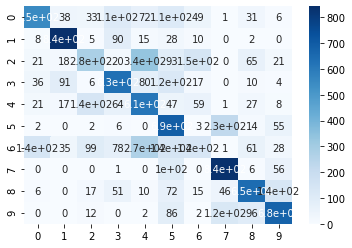

In [16]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(test_labels, clf.predict(Y_test))
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,cmap='Blues')

# Part D

In [17]:
clf1 = GaussianNB()
clf1.fit(train_data, train_labels.ravel())

GaussianNB()

In [18]:
print(classification_report(test_labels, clf1.predict(test_data), target_names=class_names))

              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           9       0.91      0.67      0.77       999

    accuracy                           0.59      9999
   macro avg       0.64      0.59      0.56      9999
weighted avg       0.64      0.59      0.56      9999

